In [404]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import mean_squared_error
sns.set_theme()

In [424]:
two_to_one_df = pd.read_csv("results/results_2_to_1_new_emip.csv")
two_to_one_df_fix_lhipa = pd.read_csv("results_2_to_1_new_feature_groups.csv")
two_to_one_df = pd.concat((two_to_one_df, two_to_one_df_fix_lhipa))
one_to_one_df = pd.read_csv("results/results_1_to_1_new_emip.csv")
two_to_one_df.columns

three_to_zero_df = pd.read_csv("results/results_3_to_0.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'results_2_to_1_new_features'

In [406]:
feature_group_regexes = {
    "eye_tracking": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
    ],
    "heatmaps": [
        "heatmaps_*",
    ],
    "fft": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "^duration_rolling__fft_aggregated__*",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_duration_rolling__fft_aggregated__*",
    ],
    "lhipa": [
        "pupil_diameter_rolling__lhipa",
        "saccade_length_rolling__lhipa",
        "saccade_duration_rolling__lhipa",
        "^duration_rolling__lhipa",
    ],
    "markov": [
        "^duration_rolling__markov",
        "pupil_diameter_rolling__markov",
        "saccade_duration_rolling__markov",
        "saccade_length_rolling__markov",
    ],
    "Arma": [
        "pupil_diameter_rolling__arma__*",
        "^duration_rolling__arma__*",
        "saccade_length_rolling__arma__*",
        "saccade_duration_rolling__arma__*",
    ],
    "garch": [
        "saccade_duration_rolling__garch",
        "^duration_rolling__garch",
        "pupil_diameter_rolling__garch",
        "saccade_length_rolling__garch",
    ],
    "pupil_diameter": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
    ],
    "fixation_duration": [
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length": [
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration": [
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "all": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
        "heatmaps_*",
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "lhipa_2": [
        "pupil_diameter_rolling__lhipa",
    ],
    "fixation_duration_2": [
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length_2": [
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration_2": [
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
}

baselines = {
    "cscw": 0.2054194369131811,
    "emip": 0.31011607853729956,
    "fractions": 0.22897823445668405,
    "emip_fractions": 0.2943192380673428,
    "fractions_cscw": 0.23408157826890597,
    "emip_cscw": 0.28871689591649174,
}

oos_baselines = {
    "cscw": 0.32471610114605565,
    "emip": 0.432999224871373,
    "fractions": 0.3569925826393109,
    "emip_fractions": 0.4171820619321137,
    "fractions_cscw": 0.3537846986139497,
    "emip_cscw": 0.4084394493388968,
}


random_baselines = {
    "cscw": 0.35408194888273653,
    "emip": 0.4241358322246148,
    "fractions": 0.39295164906188074,
    "emip_fractions": 0.4170846635199361,
    "fractions_cscw": 0.37619048780763514,
    "emip_cscw": 0.40841293420269603,
}



name_mapping = {
    "['cscw']": "cscw",
    "['emip']": "emip",
    "['fractions']": "fractions",
    "['emip', 'fractions']": "emip_fractions",
    "['fractions', 'cscw']": "fractions_cscw",
    "['emip', 'cscw']": "emip_cscw",
    "['fractions', 'emip']": "emip_fractions",
    "['cscw', 'fractions']": "fractions_cscw",
    "['cscw', 'emip']": "emip_cscw",
}

inv_map = {str(v): k for k, v in feature_group_regexes.items()}
map_names = lambda x: name_mapping.get(str(x), x)
two_to_one_df["feature_combinations"] = two_to_one_df["feature_combinations"].map(
    inv_map
)
two_to_one_df["in_study"] = two_to_one_df["in_study"].map(map_names)
two_to_one_df["baseline"] = two_to_one_df.loc[:, "in_study"].map(baselines)
two_to_one_df["oos_baseline"] = two_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
two_to_one_df["random_baseline"] = two_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
two_to_one_df["oos_random_baseline"] = two_to_one_df.loc[:, "out_of_study"].map(random_baselines)


one_to_one_df["feature_combinations"] = one_to_one_df["feature_combinations"].map(
    inv_map
)
one_to_one_df["in_study"] = one_to_one_df["in_study"].map(map_names)
one_to_one_df["baseline"] = one_to_one_df.loc[:, "in_study"].map(baselines)
one_to_one_df["oos_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
one_to_one_df["random_baseline"] = one_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
one_to_one_df["oos_random_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(
    random_baselines
)

three_to_zero_df["feature_combinations"] = three_to_zero_df["feature_combinations"].map(
    inv_map
)
three_to_zero_df.loc[:, ["rmse", "oos_rmse", "FGI", "dimensionality_reduction", "feature_combinations"]].nsmallest(5, "rmse")

,rmse,oos_rmse,FGI,dimensionality_reduction,feature_combinations
5,0.271487,0.181416,0.013546,PCA,fft
15,0.274576,0.225750,0.012344,PCA,pupil_diameter
23,0.275228,0.213219,0.012303,PCA,all
2,0.275968,0.202214,0.011771,lasso,heatmaps
10,0.276148,0.215888,0.013811,lasso,Arma


In [407]:
def filter_on_baselines(df):
    return df[(df["rmse"] < df["baseline"]) & (df["oos_rmse"] < df["oos_baseline"])]


def get_rmses(row):
    in_study_labels = json.loads(row["in_study_labels"].replace("'", '"')).values()
    out_of_study_labels = json.loads(row["oos_labels"].replace("'", '"')).values()
    in_study_prediction = json.loads(row["in_study_prediction"].replace("'", '"'))
    out_of_study_prediction = json.loads(row["oos_prediction"].replace("'", '"'))
    in_study_rmse_per_subject = [
        mean_squared_error([pred], [label], squared=False)
        for pred, label in zip(in_study_prediction, in_study_labels)
    ]
    out_of_study_rmse_per_subject = [
        mean_squared_error([pred], [label], squared=False)
        for pred, label in zip(out_of_study_prediction, out_of_study_labels)
    ]
    return (
        in_study_rmse_per_subject,
        out_of_study_rmse_per_subject,
        in_study_labels,
        out_of_study_labels,
        in_study_prediction,
        out_of_study_prediction,
    )

<AxesSubplot:xlabel='in_study'>

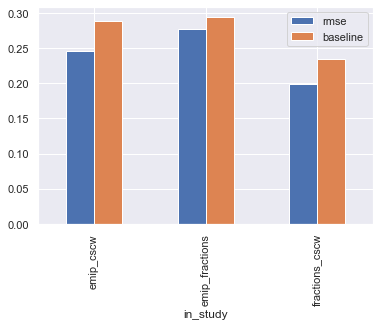

In [408]:
#MINIMUM RMSE PER DATASET
minimum_rmse = two_to_one_df.loc[two_to_one_df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

[Text(0, 0, 'eye_tracking'),
 Text(1, 0, 'all'),
 Text(2, 0, 'fixation_duration'),
 Text(3, 0, 'all'),
 Text(4, 0, 'pupil_diameter'),
 Text(5, 0, 'saccade_length'),
 Text(6, 0, 'saccade_duration'),
 Text(7, 0, 'fft'),
 Text(8, 0, 'eye_tracking'),
 Text(9, 0, 'saccade_duration'),
 Text(10, 0, 'Arma'),
 Text(11, 0, 'heatmaps'),
 Text(12, 0, 'saccade_duration'),
 Text(13, 0, 'heatmaps'),
 Text(14, 0, 'heatmaps'),
 Text(15, 0, 'markov'),
 Text(16, 0, 'fft'),
 Text(17, 0, 'garch'),
 Text(18, 0, 'saccade_duration'),
 Text(19, 0, 'eye_tracking'),
 Text(20, 0, 'saccade_duration'),
 Text(21, 0, 'saccade_length'),
 Text(22, 0, 'heatmaps'),
 Text(23, 0, 'markov'),
 Text(24, 0, 'heatmaps'),
 Text(25, 0, 'saccade_duration')]

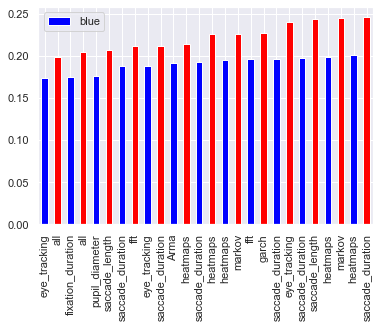

In [409]:
# TOP 13 RMSE with for one to one and 
smallest = two_to_one_df.nsmallest(13, "rmse")
smallest = smallest.reset_index()
smallest.index = 2*smallest.index +1
smallest_oto = one_to_one_df.nsmallest(13, "rmse")
smallest_oto = smallest_oto.reset_index()
smallest_oto.index = 2*smallest_oto.index
smallest = pd.concat([smallest, smallest_oto]).sort_index()


ax = smallest.loc[:,"rmse"].plot(kind="bar", color=['blue','red'], use_index=True)
ax.legend({"blue": "1t1", "red": "2to1"})
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [410]:
two_to_one_df.loc[:, "in_study"].unique()

array(['fractions_cscw', 'emip_fractions', 'emip_cscw'], dtype=object)

In [411]:
def bar_chart(df, ax, y, title, y_label, x_label, ticks_column):
    ax = df.plot(kind="bar", y=y, use_index=False, ax=ax)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.loc[:, ticks_column], rotation=90)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)


def side_by_side_bar_plot(dfs, titles, y, ticks, y_label, x_label):
    figures_per_row = min(len(dfs), 3)
    fig, axes = plt.subplots(nrows=len(dfs)//figures_per_row, ncols=figures_per_row)
    axes = axes.flatten()
    for df, ax, title in zip(dfs, axes, titles):
        bar_chart(df, ax, y, title, y_label, x_label, ticks)
    return fig

## DIMENSIONALITY REDUCTION

### BEST DIMENSIONALITY REDUCTION CONTEXT SENSITIVE 

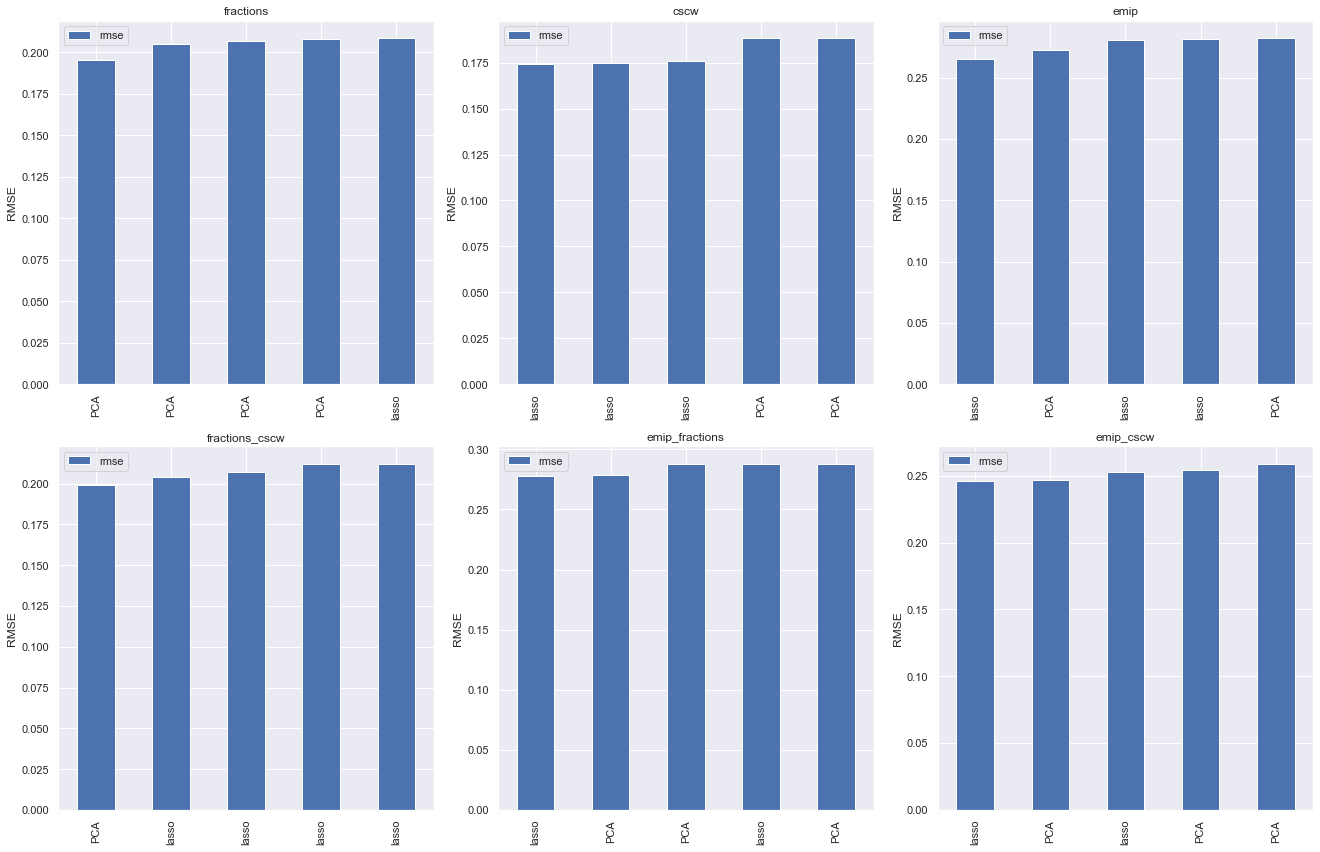

In [412]:
combined_df = pd.concat((one_to_one_df, two_to_one_df))

dfs_grouped_on_in_study = [combined_df[combined_df["in_study"] == dataset] for dataset in combined_df["in_study"].unique()]
dfs = [df.nsmallest(5, "rmse") for df in dfs_grouped_on_in_study] 
titles = [df.loc[:, "in_study"].iloc[0] for df in dfs_grouped_on_in_study]
fig = side_by_side_bar_plot(dfs, titles, y="rmse", y_label="RMSE", x_label="", ticks="dimensionality_reduction")

fig.set_size_inches(18.5, 12, forward=True)
fig.tight_layout()
fig.savefig("plots/dimensionality_reduction_context_sensitivity.jpg")


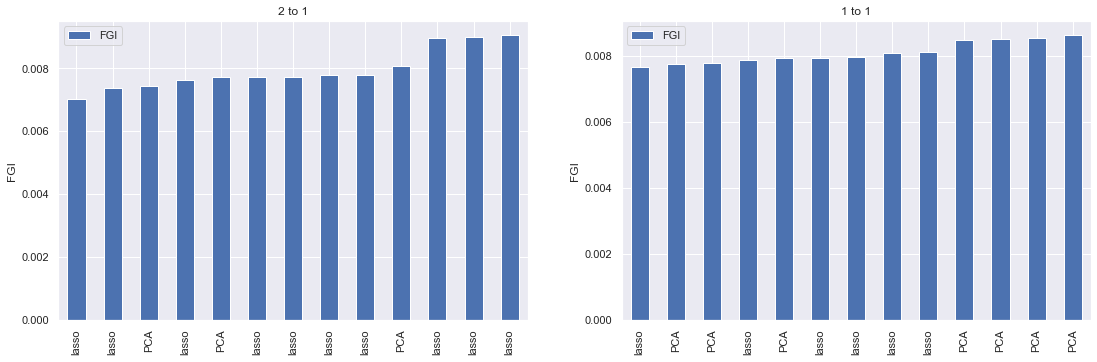

In [413]:
two_to_one_filtered = filter_on_baselines(two_to_one_df)
one_to_one_filtered = filter_on_baselines(one_to_one_df)

smallest_FGI_two_to_one = two_to_one_filtered.nsmallest(13, "FGI")
smallest_FGI_one_to_one = one_to_one_filtered.nsmallest(13, "FGI")
dfs = [smallest_FGI_two_to_one, smallest_FGI_one_to_one]
titles = ["2 to 1", "1 to 1"]

fig = side_by_side_bar_plot(dfs, titles, y="FGI", y_label="FGI", x_label="", ticks="dimensionality_reduction")
fig.set_size_inches(18.5, 5.5, forward=True)
fig.savefig("plots/dimensionality_reduction_generalizability.jpg")


## FEATURES

###  Same training and testing context

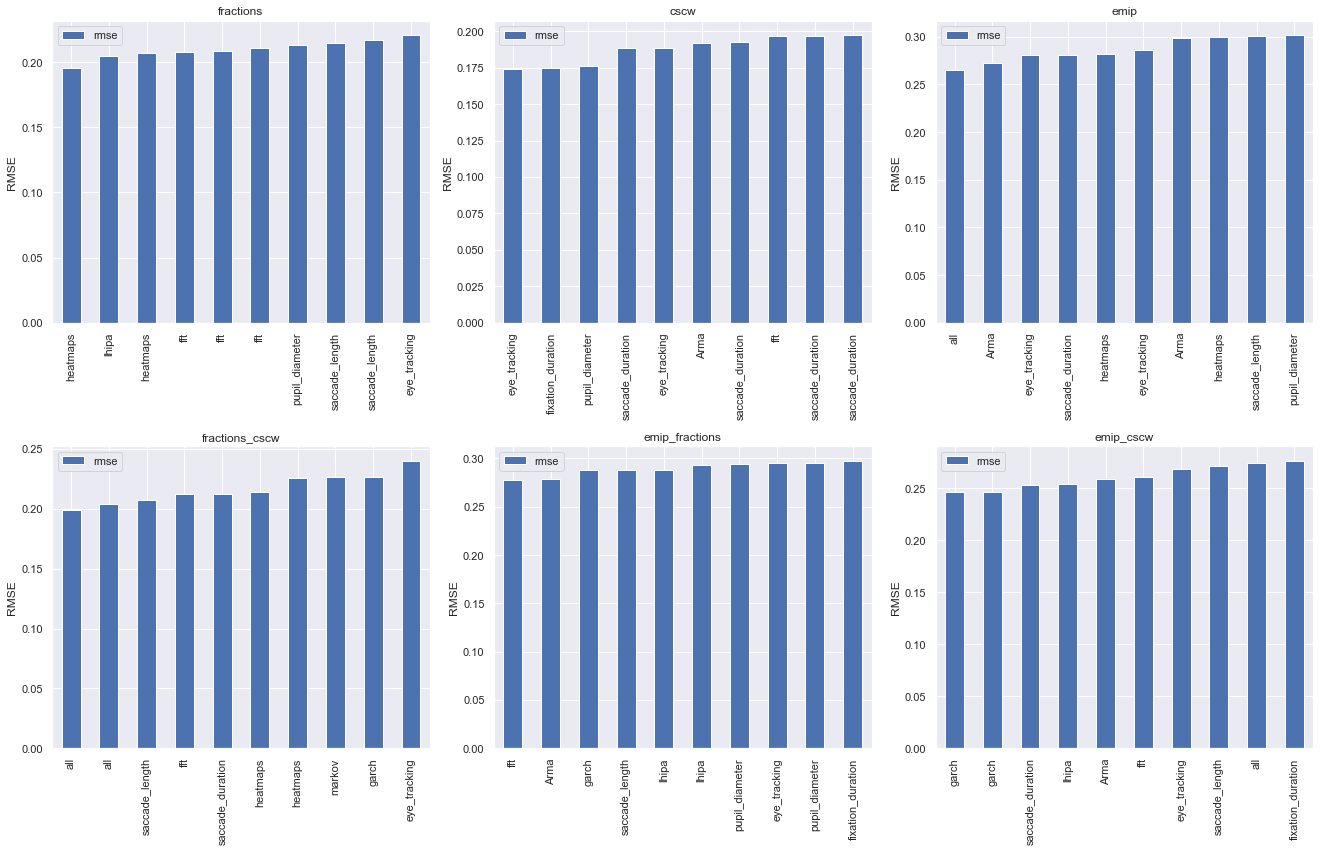

In [414]:
combined_df = pd.concat((one_to_one_df, two_to_one_df))

dfs_grouped_on_in_study = [combined_df[combined_df["in_study"] == dataset] for dataset in combined_df["in_study"].unique()]
dfs = [df.nsmallest(10, "rmse") for df in dfs_grouped_on_in_study] 
titles = [df.loc[:, "in_study"].iloc[0] for df in dfs_grouped_on_in_study]
fig = side_by_side_bar_plot(dfs, titles, y="rmse", y_label="RMSE", x_label="", ticks="feature_combinations")

fig.set_size_inches(18.5, 12, forward=True)
fig.tight_layout()
fig.savefig("plots/feature_groups_context_sensitivity.jpg")


###  Generalizability

,feature_combinations,dimensionality_reduction,in_study,FGI
12,garch,lasso,fractions_cscw,0.007031
4,fft,lasso,fractions_cscw,0.007362
23,all,PCA,fractions_cscw,0.007439
20,saccade_duration,lasso,fractions_cscw,0.007637
3,heatmaps,PCA,fractions_cscw,0.007709
18,saccade_length,lasso,fractions_cscw,0.007731
2,heatmaps,lasso,fractions_cscw,0.007735
22,all,lasso,fractions_cscw,0.007786
8,markov,lasso,fractions_cscw,0.007799
61,garch,PCA,emip_cscw,0.008065


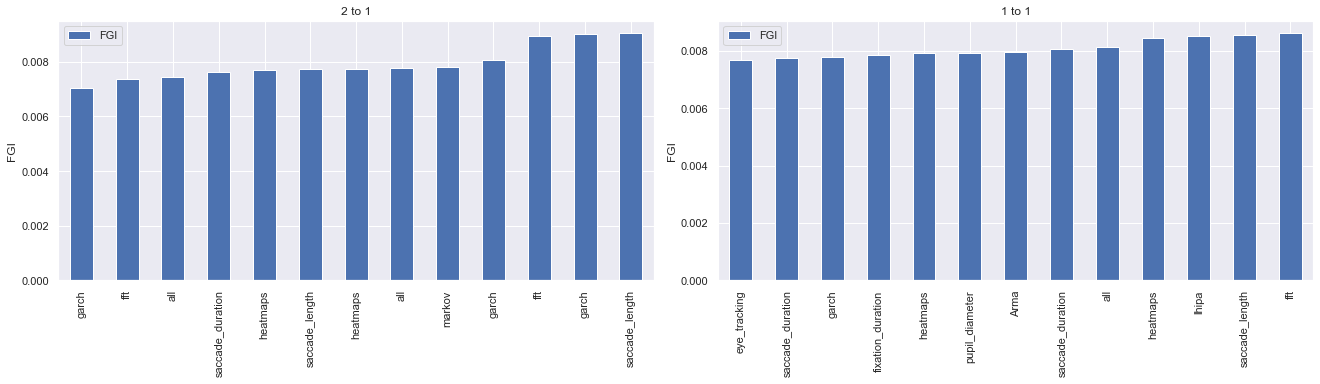

In [415]:
two_to_one_filtered = filter_on_baselines(two_to_one_df)
one_to_one_filtered = filter_on_baselines(one_to_one_df)

smallest_FGI_two_to_one = two_to_one_filtered.nsmallest(13, "FGI")
smallest_FGI_one_to_one = one_to_one_filtered.nsmallest(13, "FGI")
dfs = [smallest_FGI_two_to_one, smallest_FGI_one_to_one]
titles = ["2 to 1", "1 to 1"]



fig = side_by_side_bar_plot(dfs, titles, y="FGI", y_label="FGI", x_label="", ticks="feature_combinations")
fig.set_size_inches(18.5, 5.5, forward=True)
fig.tight_layout()
fig.savefig("plots/feature_groups_generalizability.jpg")
smallest_FGI_two_to_one.loc[:, ["feature_combinations", "dimensionality_reduction", "in_study", "FGI"]]

In [416]:
filter_on_baselines(two_to_one_df).nsmallest(20, "FGI").loc[:, ["feature_combinations", "dimensionality_reduction", "in_study", "FGI", "rmse", "oos_rmse"]]

,feature_combinations,dimensionality_reduction,in_study,FGI,rmse,oos_rmse
12,garch,lasso,fractions_cscw,0.007031,0.226896,0.351213
4,fft,lasso,fractions_cscw,0.007362,0.212122,0.323460
23,all,PCA,fractions_cscw,0.007439,0.199295,0.325404
20,saccade_duration,lasso,fractions_cscw,0.007637,0.212343,0.314541
3,heatmaps,PCA,fractions_cscw,0.007709,0.225611,0.315440
18,saccade_length,lasso,fractions_cscw,0.007731,0.207071,0.312003
2,heatmaps,lasso,fractions_cscw,0.007735,0.214010,0.311479
22,all,lasso,fractions_cscw,0.007786,0.204144,0.316990
8,markov,lasso,fractions_cscw,0.007799,0.226305,0.316791
61,garch,PCA,emip_cscw,0.008065,0.246504,0.326295


In [417]:
two_to_one_df["FGI_RANK"] = two_to_one_df.rank()["FGI"]
one_to_one_df["FGI_RANK"] = one_to_one_df.rank()["FGI"]
two_to_one_df["RMSE_RANK"] = two_to_one_df.rank()["rmse"]
one_to_one_df["RMSE_RANK"] = one_to_one_df.rank()["rmse"]

In [423]:
filter_on_baselines(two_to_one_df).groupby(by=["dimensionality_reduction"]).mean().nsmallest(10, "FGI_RANK").loc[:, ["FGI_RANK", "rmse"]]

,FGI_RANK,rmse
dimensionality_reduction,,
PCA,32.285714,0.254092
lasso,35.000000,0.253179


In [419]:

filter_on_baselines(two_to_one_df).groupby(by="feature_combinations").mean().nsmallest(10, "FGI_RANK")

,Unnamed: 0,rmse,oos_rmse,FGI,baseline,oos_baseline,random_baseline,oos_random_baseline,FGI_RANK,RMSE_RANK
feature_combinations,,,,,,,,,,
garch,44.333333,0.239854,0.335340,0.008034,0.270505,0.382328,0.397672,0.403346,18.666667,12.666667
heatmaps,18.333333,0.241194,0.314954,0.008245,0.252293,0.407664,0.386931,0.413741,24.333333,16.666667
fft,28.000000,0.250131,0.293820,0.008595,0.272373,0.371569,0.400563,0.390390,25.000000,21.666667
saccade_duration,44.000000,0.232609,0.318858,0.008686,0.261399,0.394996,0.392302,0.408544,30.000000,11.000000
all,46.500000,0.238530,0.317728,0.009047,0.261399,0.394996,0.392302,0.408544,34.000000,16.500000
lhipa,30.500000,0.290737,0.284642,0.009129,0.294319,0.324716,0.417085,0.354082,34.000000,44.500000
markov,32.000000,0.251735,0.324535,0.008684,0.261399,0.394996,0.392302,0.408544,34.000000,21.000000
saccade_length,42.000000,0.255466,0.299829,0.008924,0.272373,0.371569,0.400563,0.390390,35.000000,24.000000
Arma,59.000000,0.259152,0.343166,0.009349,0.288717,0.356993,0.408413,0.392952,40.000000,24.000000


In [357]:
two_to_one_df.groupby(by="feature_combinations").mean().nsmallest(10, "RMSE_RANK").loc[:, ["FGI_RANK", "RMSE_RANK"]]

KeyError: 'RMSE_RANK'

,Unnamed: 0,rmse,oos_rmse,FGI,baseline,oos_baseline,random_baseline,oos_random_baseline,FGI_RANK,RMSE_RANK
feature_combinations,,,,,,,,,,
saccade_length_2,2.000000,0.228811,0.313674,0.007723,0.234082,0.432999,0.376190,0.424136,24.000000,11.000000
saccade_duration,44.000000,0.232609,0.318858,0.008686,0.261399,0.394996,0.392302,0.408544,39.000000,14.500000
garch,44.333333,0.239854,0.335340,0.008034,0.270505,0.382328,0.397672,0.403346,24.666667,17.000000
heatmaps,18.333333,0.241194,0.314954,0.008245,0.252293,0.407664,0.386931,0.413741,32.666667,21.333333
all,46.500000,0.238530,0.317728,0.009047,0.261399,0.394996,0.392302,0.408544,44.750000,22.000000
fixation_duration_2,12.000000,0.249731,0.312541,0.008844,0.291518,0.340854,0.412749,0.373517,43.000000,22.000000
saccade_duration_2,12.000000,0.244008,0.327481,0.008370,0.261399,0.394996,0.392302,0.408544,31.000000,22.000000
markov,32.000000,0.251735,0.324535,0.008684,0.261399,0.394996,0.392302,0.408544,45.000000,27.000000
fft,28.000000,0.250131,0.293820,0.008595,0.272373,0.371569,0.400563,0.390390,32.666667,28.666667


In [387]:
filter_on_baselines(two_to_one_df).nsmallest(15, "oos_rmse").loc[:, ["FGI", "rmse", "oos_rmse", "feature_combinations", "in_study"]]

,FGI,rmse,oos_rmse,feature_combinations,in_study
42,0.009055,0.287888,0.259726,saccade_length,emip_fractions
28,0.009472,0.277690,0.260507,fft,emip_fractions
30,0.009093,0.293264,0.266906,lhipa,emip_fractions
48,0.010159,0.268436,0.294098,eye_tracking,emip_cscw
52,0.008950,0.260580,0.297493,fft,emip_cscw
65,0.011302,0.285780,0.299257,fixation_duration,emip_cscw
64,0.010313,0.276554,0.299260,fixation_duration,emip_cscw
62,0.010209,0.288086,0.299692,pupil_diameter,emip_cscw
31,0.009165,0.288210,0.302378,lhipa,emip_fractions
70,0.011680,0.276592,0.307554,all,emip_cscw


In [307]:

two_to_one_df.loc[:, ["rmse", "oos_rmse", "FGI", "in_study"]].nlargest(5, "rmse")

,rmse,oos_rmse,FGI,in_study
26,0.377081,0.258775,0.010974,emip_fractions
43,0.352151,0.243167,0.010702,emip_fractions
11,0.335509,0.282136,0.009971,emip_fractions
14,0.330247,0.283332,0.009501,emip_fractions
12,0.329891,0.250072,0.009890,emip_fractions


Text(0.5, 1.0, 'ID 53')

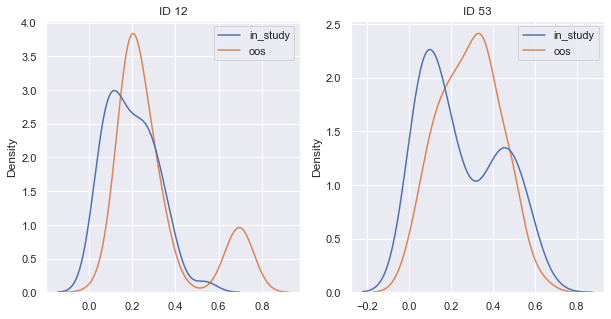

In [312]:
in_study_12, oos_12, lol, lol2 = get_rmses(two_to_one_df.iloc[12])
in_study_53, oos_53, lol, lol2 = get_rmses(two_to_one_df.iloc[53])
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 5)

sns.kdeplot(data={"in_study": in_study_12, "oos":oos_12 }, ax=axes[0], common_norm=False).set_title("ID 12")
sns.kdeplot(data={"in_study":in_study_53, "oos": oos_53}, ax=axes[1], common_norm=False).set_title("ID 53")

#fig.savefig("plots/anosim_plot.jpg")

Text(0.5, 1.0, 'labels')

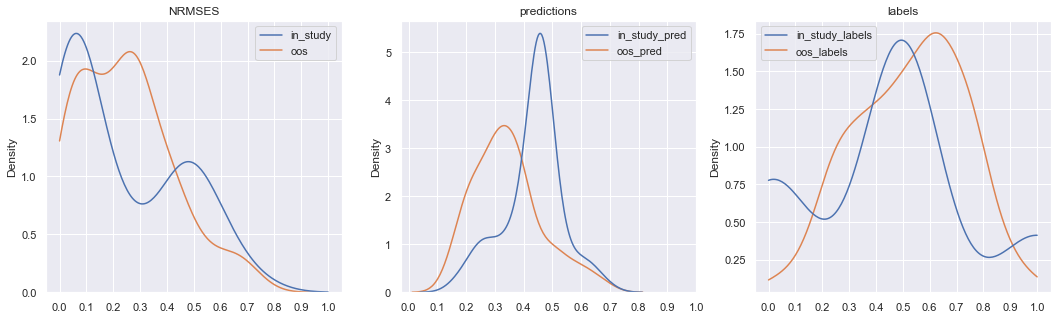

In [389]:
in_study_12, oos_12, labels, oos_labels, in_study_pred, oos_pred = get_rmses(
    two_to_one_df.iloc[31]
)
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18, 5)

sns.kdeplot(
    data={
        "in_study": in_study_12,
        "oos": oos_12,
    },
    ax=axes[0],
    common_norm=False,
    clip=(0,1)
).set_title("NRMSES")

sns.kdeplot(
    data={
        "in_study_pred": in_study_pred,
        "oos_pred": oos_pred,
    },
    ax=axes[1],
    common_norm=False,
    clip=(0,1)
).set_title("predictions")
axes[0].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
axes[1].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
axes[2].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

sns.kdeplot(
    data={
        "in_study_labels": labels,
        "oos_labels": oos_labels,
    },
    ax=axes[2],
    common_norm=False,
    clip=(0,1)
).set_title("labels")

# fig.savefig("plots/anosim_plot.jpg")